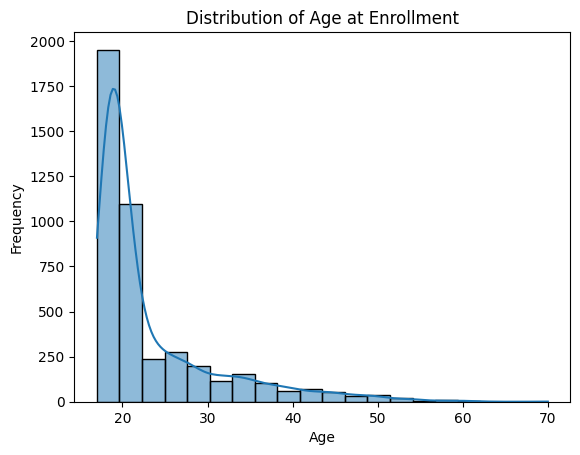

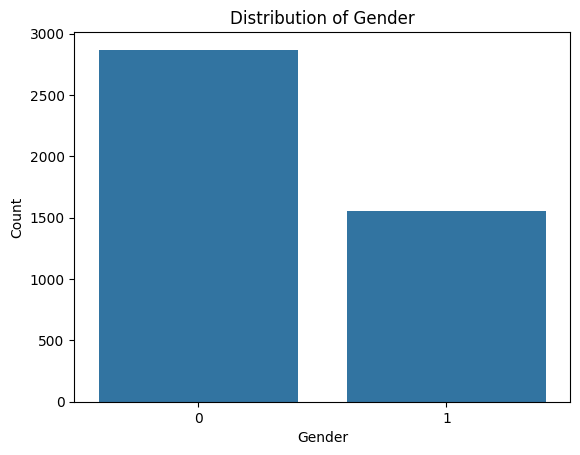

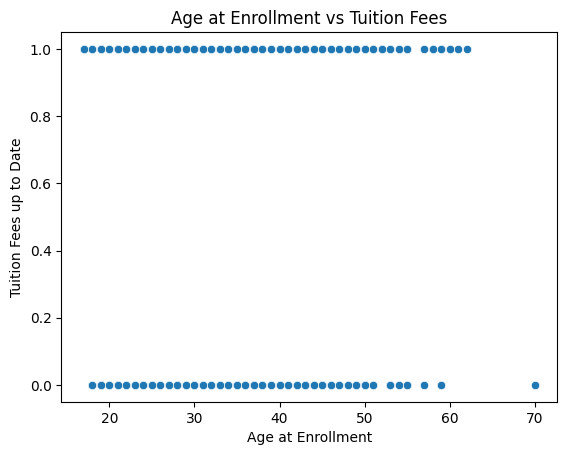

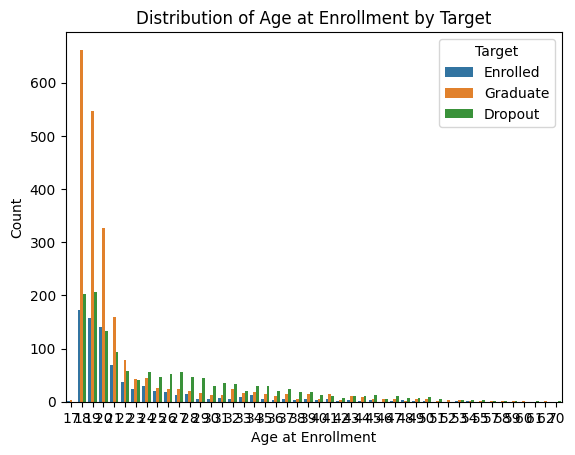

In [1]:
# Source code to visualize my dataset
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
grad_prediction =pd.read_csv('./students.csv')
#visualize the data
# Visualize the distribution of Age at enrollment
sns.histplot(grad_prediction['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Visualize the distribution of Gender
sns.countplot(x='Gender', data=grad_prediction)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between Age at enrollment and Tuition fees up to date
sns.scatterplot(x='Age at enrollment', y='Tuition fees up to date', data=grad_prediction)
plt.title('Age at Enrollment vs Tuition Fees')
plt.xlabel('Age at Enrollment')
plt.ylabel('Tuition Fees up to Date')
plt.show()

#visualize age and target relationship
sns.countplot(x='Age at enrollment', hue='Target', data=grad_prediction)
plt.title('Distribution of Age at Enrollment by Target')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Code for splitting the data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
grad_prediction = "/content/GradPredictdataset.csv"
data = pd.read_csv(grad_prediction)

# Define the columns for splitting
columns_to_split = ['Marital status', 'Application mode', 'Application order', 'Course',
                    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
                    "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
                    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
                    'International', 'Curricular units 1st sem (credited)',
                    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                    'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                    'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate',
                    'GDP']

# Define the target column
target_column = 'Target'

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data[columns_to_split], data[target_column], test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Training target shape:", train_target.shape)
print("Testing target shape:", test_target.shape)


Training data shape: (3539, 34)
Testing data shape: (885, 34)
Training target shape: (3539,)
Testing target shape: (885,)


In [ ]:
# Code to check if there are categorical values
print(data['Target'].unique())


['Dropout' 'Graduate' 'Enrolled']


In [ ]:
# Code for training the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
grad_prediction = "/content/GradPredictdataset.csv"
data = pd.read_csv(grad_prediction)

# Define the columns for training the model
columns_for_training = ['Marital status', 'Application mode', 'Application order', 'Course',
                         'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
                         "Mother's qualification", "Father's qualification", "Mother's occupation",
                         "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
                         'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
                         'International', 'Curricular units 1st sem (credited)',
                         'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                         'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                         'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                         'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                         'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                         'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate',
                         'GDP']

# Define the target column
target_column = 'Target'
# Convert 'Target' column to numeric labels
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[columns_for_training], data[target_column], test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model fitting
model.fit(X_train_scaled, y_train)


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)



Accuracy: 0.6971751412429379
Confusion Matrix:
 [[287   1  28]
 [119   6  26]
 [ 91   3 324]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.91      0.71       316
           1       0.60      0.04      0.07       151
           2       0.86      0.78      0.81       418

    accuracy                           0.70       885
   macro avg       0.68      0.57      0.53       885
weighted avg       0.71      0.70      0.65       885



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
